# Spike-Triggered Average

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from jupyterthemes import jtplot
jtplot.style(theme='monokai', ticks=True)
%matplotlib inline

In [2]:
FILENAME = 'c1p8.pickle'

In [3]:
with open(FILENAME, 'rb') as f:
    data = pickle.load(f)

stim = data['stim']
rho = data['rho']

Stimulus: white-noise / Gaussian

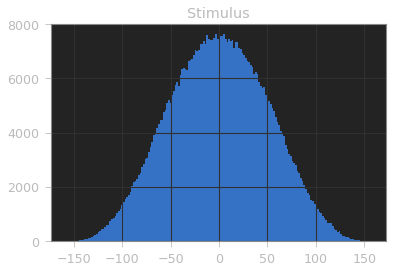

In [4]:
fig, ax = plt.subplots()
ax.hist(stim, bins='auto')
ax.set_title('Stimulus')
plt.show()

Sampling rate: 500 Hz

How many ms are there between adjacent samples (sampling period)?

$$ \Delta t = 2ms$$

In [5]:
sampling_period = 2

We wish to compute the spike-triggered average for this neuron over a **window of width 300 ms**. Suppose we do not care about the value exactly 300 ms before the spike. How many elements (time steps) will be in our resulting spike-triggered average vector?

In [6]:
window_size = 300

In [7]:
num_timesteps = int(window_size/2); num_timesteps

150

In order to calculate the average, it is necessary for us to know how many time windows (stimulus vectors) we are averaging over. This is equal to the number of observed spikes. 

* How many spikes were observed in this recording? You should not count any spikes that occur before 300 ms from the beginning of the recording.

*  spike-triggered average is the element-wise mean of the time windows starting 300 ms before (exclusive) and ending 0 ms before a spike. 

In [8]:
def compute_sta(stim, rho, num_timesteps):
    """Compute the spike-triggered average from a stimulus and spike-train.
    
    Args:
        stim: stimulus time-series
        rho: spike-train time-series
        num_timesteps: how many timesteps to use in STA
        
    Returns:
        spike-triggered average for num_timesteps timesteps before spike"""
    
    sta = np.zeros((num_timesteps,))

    # This command finds the indices of all of the spikes that occur
    # after 300 ms into the recording.
    spike_times = rho[num_timesteps:].nonzero()[0] + num_timesteps

    # Fill in this value. Note that you should not count spikes that occur
    # before 300 ms into the recording.
    num_spikes = len(spike_times)
    print(f'Number of spikes: M={num_spikes}')
    # Compute the spike-triggered average of the spikes found.
    # To do this, compute the average of all of the vectors
    # starting 300 ms (exclusive) before a spike and ending at the time of
    # the event (inclusive). Each of these vectors defines a list of
    # samples that is contained within a window of 300 ms before each
    # spike. The average of these vectors should be completed in an
    # element-wise manner.
    # 
    # Your code goes here.
    for idx in spike_times:
        sta += stim[idx-num_timesteps:idx]
    sta /= num_spikes
    return sta

In [9]:
sta = compute_sta(stim, rho, num_timesteps)

Number of spikes: M=53583


In [10]:
# We look backwards in time
time = (np.arange(-num_timesteps, 0)+1) * sampling_period

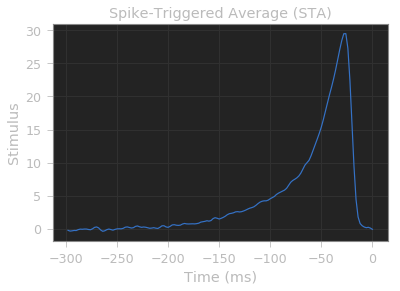

In [12]:
plt.plot(time, sta)
plt.xlabel('Time (ms)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average (STA)')
plt.show()

The nature of this neuron (the mathematical operation of the stimulus it computes) is a leaky integration.


Assuming that all positive stimuli have a value of c and all negative stimuli have a value of −c where c>0 (All non-zero values have the same magnitude). The neuron is expected to respond most strongly to a constant positive value.